In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random as rng

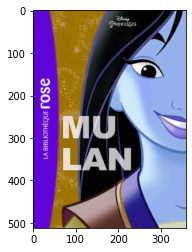

In [80]:
# read the image
image = cv2.imread("2.jpg")
plt.imshow(image, cmap="gray")
plt.show()

In [81]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

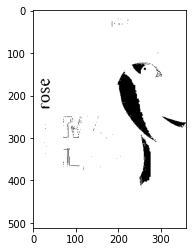

In [82]:
# create a binary thresholded image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

In [83]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


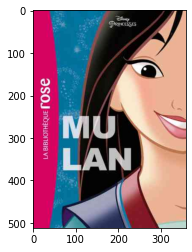

In [84]:
# show the image with the drawn contours
plt.imshow(image)
plt.show()

In [85]:
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv2.approxPolyDP(c, 1, True)
    boundRect[i] = cv2.boundingRect(contours_poly[i])

In [86]:
"""
# Draw polygonal contour + bonding rects + circles
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv2.drawContours(image, contours_poly, i, color)
    cv2.rectangle(image, (int(boundRect[i][0]), int(boundRect[i][1])), \
      (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
"""

'\n# Draw polygonal contour + bonding rects + circles\nfor i in range(len(contours)):\n    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))\n    cv2.drawContours(image, contours_poly, i, color)\n    cv2.rectangle(image, (int(boundRect[i][0]), int(boundRect[i][1])),       (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)\n'

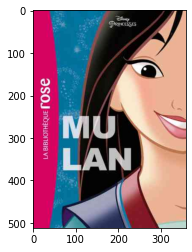

In [87]:
# Show in a window
plt.imshow(image)
plt.show()

In [88]:
cnt = sorted(contours, key=cv2.contourArea)

In [89]:
for i, c in enumerate(cnt[:2]):
    contours_poly[i] = cv2.approxPolyDP(c, 1, True)
    boundRect[i] = cv2.boundingRect(contours_poly[i])
bounding_rects_sorted = sorted(boundRect, key=lambda x: x[1]*x[2])
bounding_rects = bounding_rects_sorted[-2:]

In [90]:
"""
for i in range(len(bounding_rects)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv2.rectangle(image, (int(bounding_rects[i][0]), int(bounding_rects[i][1])), \
      (int(bounding_rects[i][0]+bounding_rects[i][2]), int(bounding_rects[i][1]+bounding_rects[i][3])), color, 2)
"""

'\nfor i in range(len(bounding_rects)):\n    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))\n    cv2.rectangle(image, (int(bounding_rects[i][0]), int(bounding_rects[i][1])),       (int(bounding_rects[i][0]+bounding_rects[i][2]), int(bounding_rects[i][1]+bounding_rects[i][3])), color, 2)\n'

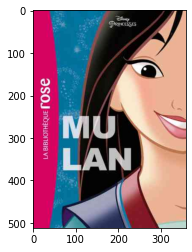

In [91]:
# Show in a window
plt.imshow(image)
plt.show()

In [92]:
for i in range(len(bounding_rects)):
    x,y,w,h = bounding_rects[i]
    temp_image = image[y:y+h, x:x+w]
    cv2.imwrite(str(i)+".jpg", temp_image)

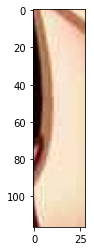

In [93]:
img = cv2.imread("0.jpg")
plt.imshow(img)
plt.show()

In [94]:
cntsSorted

[array([[287, 485]], dtype=int32)]

In [ ]:
import cv2
import numpy as np

# load the images
empty = cv2.imread("empty.jpg")
full = cv2.imread("test.jpg")

# save color copy for visualization
full_c = full.copy()

# convert to grayscale
empty_g = cv2.cvtColor(empty, cv2.COLOR_BGR2GRAY)
full_g = cv2.cvtColor(full, cv2.COLOR_BGR2GRAY)

empty_g = cv2.GaussianBlur(empty_g, (51, 51), 0)
full_g = cv2.GaussianBlur(full_g, (51, 51), 0)
diff = full_g - empty_g

#  thresholding

diff_th = 
cv2.adaptiveThreshold(full_g,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
cv2.THRESH_BINARY,11,2)

# combine the difference image and the inverse threshold
zone = cv2.bitwise_and(diff, diff_th, None)

# threshold to get the mask instead of gray pixels
_, zone = cv2.threshold(bag, 100, 255, 0)

# dilate to account for the blurring in the beginning
kernel = np.ones((15, 15), np.uint8)
bag = cv2.dilate(bag, kernel, iterations=1)

# find contours, sort and draw the biggest one
contours, _ = cv2.findContours(bag, cv2.RETR_TREE,
                              cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:3]
i = 0
while i < len(contours):
    x, y, width, height = cv2.boundingRect(contours[i])
    roi = full_c[y:y+height, x:x+width]
    cv2.imwrite("piece"+str(i)+".png", roi)
    i += 1